In [1]:
%gui qt

In [2]:
import os
import sys
sys.path.insert(0, '/Volumes/group/awagner/sgagnon/scripts/lyman-tools/viz/')
from plot_surface import *
from nilearn import plotting as nip

/Users/steph-backup/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/steph-backup/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
%gui qt
%matplotlib inline
%gui qt

In [4]:
mni_template = '/Volumes/group/awagner/sgagnon/AP/data/avg152T1_brain.nii.gz'

In [5]:
def plot_snapviews(snapshots, snap_views, hemi='lh'):
    n_panels = len(snap_views)
    f, axes = plt.subplots(1,n_panels, figsize=(5*n_panels,10))
    for ax, view in zip(axes.flat, snap_views):
        ax.set_axis_off()
        ax.imshow(snapshots[view], rasterized=True)
        
    f.savefig('/Volumes/group/awagner/sgagnon/AP/results/control-stress_safe_sourcehit-cr_{hemi}_p005.png'.format(hemi=hemi), 
              dpi=600)

In [6]:
print 'running'

running


## Plot frontoparietal networks

In [20]:
hemi = 'lh'
subid='fsaverage'
brain = Brain(subid, hemi, "semi7", background='white', size=(800,800), cortex=("gray", -2, 7, True))

brain.add_label('frontoparietal', hemi=hemi, color=(204./255, 121./255, 167./255), alpha = 0.7)
brain.add_label('frontoparietal', hemi=hemi, color=(204./255, 121./255, 167./255), borders=True)

brain.add_label('dorsalattn', hemi=hemi, color=(0./255, 158./255, 115./255), alpha = 0.7)
brain.add_label('dorsalattn', hemi=hemi, color=(0./255, 158./255, 115./255), borders=True)

brain.save_imageset('/Users/steph-backup/Dropbox/Stanford/Papers/Dissertation/Figures_defense/AP_frontoparietal_{hemi}_colorblind'.format(hemi=hemi), 
                    ['lat'], filetype='tiff')

['/Users/steph-backup/Dropbox/Stanford/Papers/Dissertation/Figures_defense/AP_frontoparietal_lh_colorblind_lat.tiff']

In [21]:
hemi = 'lh'
subid='fsaverage'
brain = Brain(subid, hemi, "semi7", background='white', size=(800,800), cortex='low_contrast')
brain.add_label('frontoparietal', hemi=hemi, color=(112./255, 201./255, 231./255), alpha = 0.7)
brain.add_label('frontoparietal', hemi=hemi, color=(112./255, 201./255, 231./255), borders=True)

brain.add_label('dorsalattn', hemi=hemi, color=(202./255, 152./255, 235./255), alpha = 0.7)
brain.add_label('dorsalattn', hemi=hemi, color=(202./255, 152./255, 235./255), borders=True)

brain.save_imageset('/Users/steph-backup/Dropbox/Stanford/Papers/Dissertation/Figures_defense/AP_frontoparietal_{hemi}'.format(hemi=hemi), 
                    ['lat', 'fro'], filetype='tiff')

['/Users/steph-backup/Dropbox/Stanford/Papers/Dissertation/Figures_defense//AP_frontoparietal_lh_lat.tiff',
 '/Users/steph-backup/Dropbox/Stanford/Papers/Dissertation/Figures_defense//AP_frontoparietal_lh_fro.tiff']

## localizer coefficients on example brain

### Just mask:

In [9]:
subid = 'ap164'

place_coefs = '/Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/'+subid+'/importance_maps/bilat-parahipp_fusi_inftemp_nohipp_coef_place.nii.gz'
mask = '/Volumes/group/awagner/sgagnon/AP/data/'+subid+'/masks/bilat-parahipp_fusi_inftemp_nohipp.nii.gz'

for hemi in ['lh', 'rh']:
    
    brain = Brain(subid, hemi, "inflated", background='white', size=(850,800))

    maskmap = project_volume_data(mask, hemi, subject_id=subid, smooth_fwhm=0).astype(bool)
    
    maskmap = ~maskmap
    brain.add_data(maskmap, min=0, max=10, thresh=.5, hemi=hemi,
                   colormap="bone", alpha=.6, colorbar=False)
    
    brain.show_view("ven")
    
    brain.save_imageset('/Users/steph-backup/Dropbox/Stanford/Papers/Dissertation/Figures/AP_VTCmask_{hemi}_ap164'.format(hemi=hemi), 
                        ['ven'], filetype='tiff')
    brain.save_imageset('/Volumes/group/awagner/sgagnon/AP/results/AP_VTCmask_{hemi}_ap164'.format(hemi=hemi), 
                        ['ven'], filetype='tiff')

mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/data/ap164/masks/bilat-parahipp_fusi_inftemp_nohipp.nii.gz --hemi lh --surf white --regheader ap164 --projfrac-avg 0 1 0.1 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sewxNc0.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/data/ap164/masks/bilat-parahipp_fusi_inftemp_nohipp.nii.gz --hemi lh --surf white --regheader ap164 --projfrac-avg 0 1 0.1 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sewxNc0.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/data/ap164/masks/bilat-parahipp_fusi_inftemp_nohipp.nii.gz --hemi rh --surf white --regheader ap164 --projfrac-avg 0 1 0.1 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sIGsmpy.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/data/ap164/masks/bilat-parahipp_fusi_inftemp_nohipp.nii.gz --hemi rh --surf white --regheader ap164 --projfrac-avg 0 1 0.1 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sIGsmpy.mgz


In [50]:
brain.show_vi

((-7.0167092985348768e-15,
  90.0,
  554.90338134765625,
  array([ 0.92526245,  0.        ,  0.        ])),
 -90.0)

In [72]:
brain.show_view({'distance': 600}, roll=0)

((0.0,
  180.0,
  671.43309143066415,
  array([ 0.92526245,  0.        ,  0.        ])),
 -0.0)

In [87]:
brain.show_view({'azimuth': -177, 'elevation': 88}, roll=91)
brain.save_image('/Volumes/group/awagner/sgagnon/AP/results/AP_VTCmask_ap164_')

((-177.00000000000003,
  87.999999999999986,
  554.90338134765625,
  array([ 0.92526245,  0.        ,  0.        ])),
 91.0)

In [84]:
brain.show_view()

((-176.97558539950552,
  88.003154876353634,
  554.90338134765341,
  array([ 0.92526245,  0.        ,  0.        ])),
 90.63592937040879)

In [17]:
subid = 'ap164'

place_coefs = '/Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/'+subid+'/importance_maps/bilat-parahipp_fusi_inftemp_nohipp_coef_place.nii.gz'
mask = '/Volumes/group/awagner/sgagnon/AP/data/'+subid+'/masks/bilat-parahipp_fusi_inftemp_nohipp.nii.gz'

for hemi in ['lh', 'rh']:
    
    brain = Brain(subid, hemi, "inflated", background='white', size=(850,800))

    coefmap = project_volume_data(place_coefs, hemi, subject_id=subid, smooth_fwhm=0)
    maskmap = project_volume_data(mask, hemi, subject_id=subid, smooth_fwhm=0).astype(bool)
    
    brain.add_data(coefmap, min=-0.09, max=0.09, colormap="PiYG", hemi=hemi, alpha=.8, colorbar=True)
    
    maskmap = ~maskmap
    brain.add_data(maskmap, min=0, max=10, thresh=.5, hemi=hemi,
                   colormap="bone", alpha=.6, colorbar=False)
    
    brain.show_view("ven")
    
    brain.save_imageset('/Users/steph-backup/Dropbox/Stanford/Papers/Dissertation/Figures/AP_localizercoef_green_cmap_{hemi}_ap164'.format(hemi=hemi), 
                        ['ven'], filetype='tiff')

mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/ap164/importance_maps/bilat-parahipp_fusi_inftemp_nohipp_coef_place.nii.gz --hemi lh --surf white --regheader ap164 --projfrac-avg 0 1 0.1 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sGmqAyv.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/ap164/importance_maps/bilat-parahipp_fusi_inftemp_nohipp_coef_place.nii.gz --hemi lh --surf white --regheader ap164 --projfrac-avg 0 1 0.1 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sGmqAyv.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/data/ap164/masks/bilat-parahipp_fusi_inftemp_nohipp.nii.gz --hemi lh --surf white --regheader ap164 --projfrac-avg 0 1 0.1 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2swHi5JX.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/data/ap164/masks/bilat-parahipp_fusi_inftemp_nohipp.nii.gz --hemi lh --surf white --regheader ap164 --projfrac-avg 0 1 0.1 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2swHi5JX.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/ap164/importance_maps/bilat-parahipp_fusi_inftemp_nohipp_coef_place.nii.gz --hemi rh --surf white --regheader ap164 --projfrac-avg 0 1 0.1 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s18PsA1.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/ap164/importance_maps/bilat-parahipp_fusi_inftemp_nohipp_coef_place.nii.gz --hemi rh --surf white --regheader ap164 --projfrac-avg 0 1 0.1 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s18PsA1.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/data/ap164/masks/bilat-parahipp_fusi_inftemp_nohipp.nii.gz --hemi rh --surf white --regheader ap164 --projfrac-avg 0 1 0.1 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sdobzNM.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/data/ap164/masks/bilat-parahipp_fusi_inftemp_nohipp.nii.gz --hemi rh --surf white --regheader ap164 --projfrac-avg 0 1 0.1 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sdobzNM.mgz


In [12]:
subid = 'ap164'

place_coefs = '/Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/'+subid+'/importance_maps/bilat-parahipp_fusi_inftemp_nohipp_coef_place.nii.gz'
mask = '/Volumes/group/awagner/sgagnon/AP/data/'+subid+'/masks/bilat-parahipp_fusi_inftemp_nohipp.nii.gz'

for hemi in ['lh', 'rh']:
    
    brain = Brain(subid, hemi, "inflated", background='white', size=(850,800))

    coefmap = project_volume_data(place_coefs, hemi, subject_id=subid, smooth_fwhm=0)
    maskmap = project_volume_data(mask, hemi, subject_id=subid, smooth_fwhm=0).astype(bool)
    
    brain.add_data(coefmap, min = 0, thresh=0.000000000000000000000000001, colormap="Greens", hemi=hemi, alpha=.8, colorbar=False)
    brain.add_data(-coefmap, min = 0, thresh=0.000000000000000000000000001, colormap="PuRd", hemi=hemi, alpha=.8, colorbar=False)
    
    maskmap = ~maskmap
    brain.add_data(maskmap, min=0, max=10, thresh=.5, hemi=hemi,
                   colormap="bone", alpha=.6, colorbar=False)
    
    brain.show_view("ven")
    
    brain.save_imageset('/Users/steph-backup/Dropbox/Stanford/Papers/Dissertation/Figures/AP_localizercoef_{hemi}_ap164'.format(hemi=hemi), 
                        ['ven'], filetype='tiff')

mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/ap164/importance_maps/bilat-parahipp_fusi_inftemp_nohipp_coef_place.nii.gz --hemi lh --surf white --regheader ap164 --projfrac-avg 0 1 0.1 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2siN90PX.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/ap164/importance_maps/bilat-parahipp_fusi_inftemp_nohipp_coef_place.nii.gz --hemi lh --surf white --regheader ap164 --projfrac-avg 0 1 0.1 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2siN90PX.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/data/ap164/masks/bilat-parahipp_fusi_inftemp_nohipp.nii.gz --hemi lh --surf white --regheader ap164 --projfrac-avg 0 1 0.1 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2slsFadH.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/data/ap164/masks/bilat-parahipp_fusi_inftemp_nohipp.nii.gz --hemi lh --surf white --regheader ap164 --projfrac-avg 0 1 0.1 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2slsFadH.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/ap164/importance_maps/bilat-parahipp_fusi_inftemp_nohipp_coef_place.nii.gz --hemi rh --surf white --regheader ap164 --projfrac-avg 0 1 0.1 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s13D1LV.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/ap164/importance_maps/bilat-parahipp_fusi_inftemp_nohipp_coef_place.nii.gz --hemi rh --surf white --regheader ap164 --projfrac-avg 0 1 0.1 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s13D1LV.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/data/ap164/masks/bilat-parahipp_fusi_inftemp_nohipp.nii.gz --hemi rh --surf white --regheader ap164 --projfrac-avg 0 1 0.1 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sT20TKI.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/data/ap164/masks/bilat-parahipp_fusi_inftemp_nohipp.nii.gz --hemi rh --surf white --regheader ap164 --projfrac-avg 0 1 0.1 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sT20TKI.mgz


## Sphere from SH > CR by group:

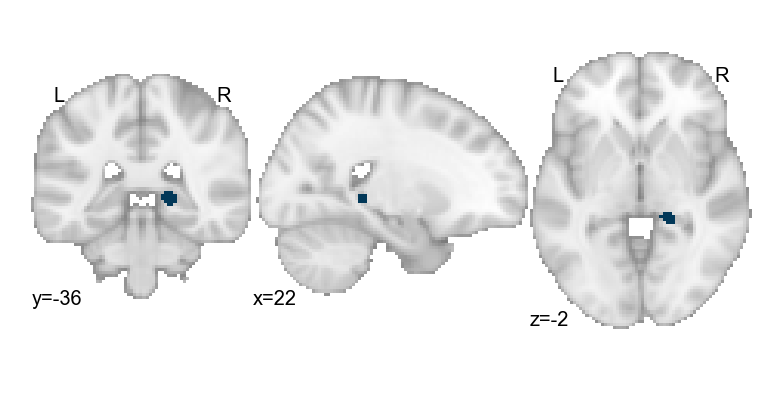

In [139]:
z_thresh = .5
stat_map = op.join('/Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-cr/zstat1_peak1_5mm_sphere_masked.nii.gz')
                   
fig = plt.figure(dpi=600, figsize=(10,5))
display = nip.plot_stat_map(stat_map, bg_img=mni_template,
                  threshold=z_thresh, 
                  black_bg=False, 
                  cut_coords=[22,-36, -2], draw_cross=False,
                  cmap='PuBu', colorbar=False, annotate=False, figure=fig)
display.annotate(size=20)
fig.savefig('/Users/steph-backup/Dropbox/Stanford/Papers/Dissertation/Figures/DPI150_jpg/AP_sphere_sh-cr_ctrl-str.jpeg', dpi=150)

## Assoc hit > CR

#### Group interaction (p < 0.05, corrected):

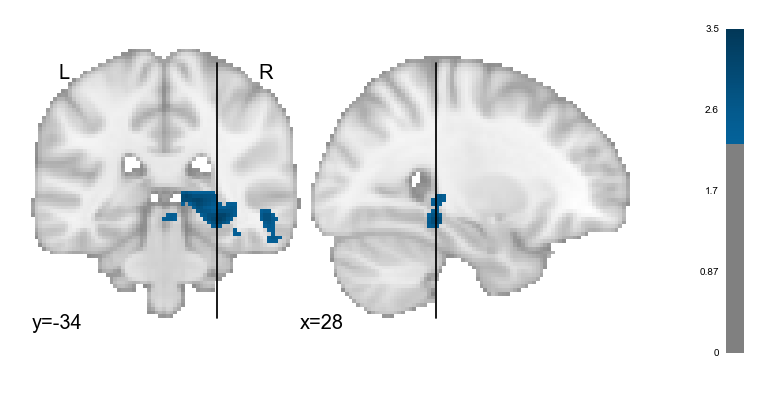

In [12]:
exp = 'ap_memory_raw'
group = 'group_control-stress'
contrast = 'sourcehit-cr'
z_thresh = 2.3
stat_map = op.join('/Volumes/group/awagner/sgagnon/AP/analysis',
                   exp, group, 'mni', contrast, 'zstat1_threshold.nii.gz')
                   
    
fig = plt.figure(dpi=600, figsize=(10,5))
display = nip.plot_stat_map(stat_map, bg_img=mni_template,
                  threshold=z_thresh, display_mode='yx', 
                  black_bg=False, 
                  cut_coords=[28, -34], 
                  cmap='PuBu', colorbar=True, annotate=True, figure=fig)
display.annotate(size=20)
fig.savefig('/Volumes/group/awagner/sgagnon/AP/results/ap_memory_raw_control-stress_sourcehit-cr.png')

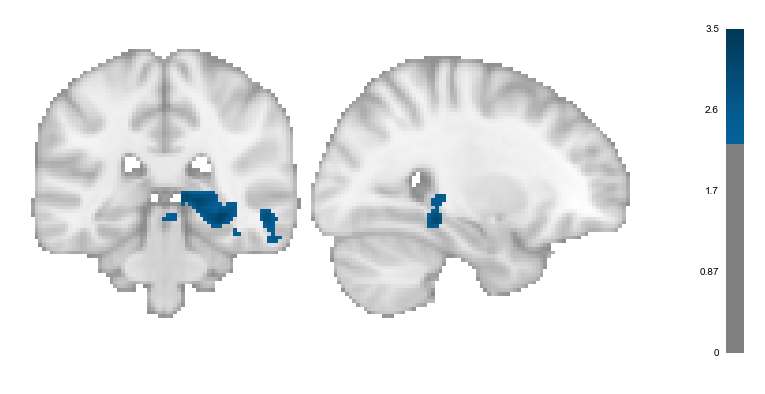

In [23]:
exp = 'ap_memory_raw'
group = 'group_control-stress'
contrast = 'sourcehit-cr'
z_thresh = 2.3
stat_map = op.join('/Volumes/group/awagner/sgagnon/AP/analysis',
                   exp, group, 'mni', contrast, 'zstat1_threshold.nii.gz')
                   
    
fig = plt.figure(dpi=600, figsize=(10,5))
display = nip.plot_stat_map(stat_map, bg_img=mni_template,
                  threshold=z_thresh, display_mode='yx', 
                  black_bg=False, 
                  cut_coords=[28, -34],  draw_cross=False,
                  cmap='PuBu', colorbar=True, annotate=False, figure=fig)
fig.savefig('/Volumes/group/awagner/sgagnon/AP/results/ap_memory_raw_control-stress_sourcehit-cr_nocrossbar.png')

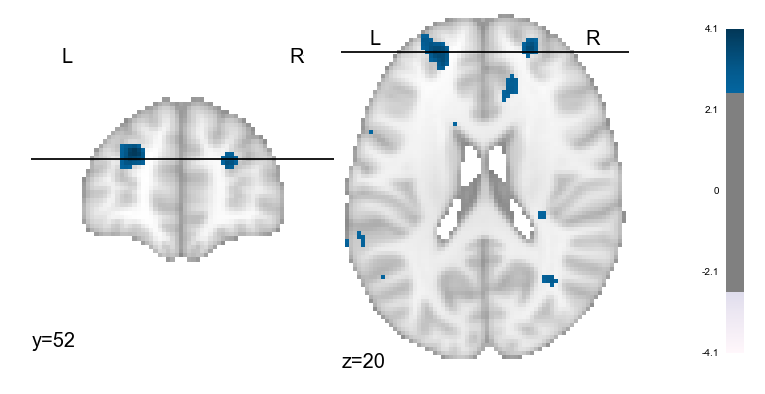

In [17]:
exp = 'ap_memory_raw'
group = 'group_control-stress'
contrast = 'sourcehit-cr'
z_thresh = 2.58
stat_map = op.join('/Volumes/group/awagner/sgagnon/AP/analysis',
                   exp, group, 'mni', contrast, 'zstat1.nii.gz')
                   
    
fig = plt.figure(dpi=600, figsize=(10,5))
display= nip.plot_stat_map(stat_map, bg_img=mni_template,
                  threshold=z_thresh, display_mode='yz', 
                  black_bg=False, 
                  cut_coords=[52, 20], 
                  cmap='PuBu', colorbar=True, annotate=True, figure=fig)
display.annotate(size=20)

fig.savefig('/Volumes/group/awagner/sgagnon/AP/results/ap_memory_raw_control-stress_sourcehit-cr_fpc_p005uncorr.tiff')

### Conjunction

In [23]:
subj = 'fsaverage'
hemis = ['lh', 'rh']
exp = ['ap_memory_raw']
z_thresh = 2.3 # p < 0.01
contrast = 'sourcehit-CR'
colors = ['Blues_r', 'Oranges_r']

for hemi in hemis:
    plot_groups(subj, hemi, exp, contrast, colors, z_thresh, 
               '/Volumes/group/awagner/sgagnon/AP/results/controlstress_conj_sourcehit-CR/map_nocontour_{hemi}_p05corr.png'.format(hemi=hemi), 
                save_views =['lat', 'med', 'fro'],
                alpha=.8,
               save_file=True, colorbar=True,
               base_exp='/Volumes/group/awagner/sgagnon/AP',
               sig_to_z=False, regspace='mni',
               corrected=True,
               plot_conjunction=True,
               add_border=False)

ap_memory_raw sourcehit-CR group_control
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sUUB4am.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sUUB4am.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sTrnyeW.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sTrnyeW.mgz


5.73502180099
ap_memory_raw sourcehit-CR group_stress
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_stress/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sLWDadP.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_stress/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sLWDadP.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_stress/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s71DA_g.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_stress/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s71DA_g.mgz


4.90102800369
Colorbar max: z = 5.73502180099
sourcehit-CR Blues_r
/Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sSZJh7G.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sSZJh7G.mgz


sourcehit-CR Oranges_r
/Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_stress/mni/sourcehit-CR/zstat1_threshold.nii.gz
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_stress/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sTCmcUs.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_stress/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sTCmcUs.mgz


plotting conjunction
ap_memory_raw sourcehit-CR group_control
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s2rEh3S.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s2rEh3S.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sCU4IS6.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sCU4IS6.mgz


5.73502180099
ap_memory_raw sourcehit-CR group_stress
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_stress/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sG6NdCQ.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_stress/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sG6NdCQ.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_stress/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sv0ulQM.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_stress/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sv0ulQM.mgz


4.90102800369
Colorbar max: z = 5.73502180099
sourcehit-CR Blues_r
/Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sI9nLtO.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sI9nLtO.mgz


sourcehit-CR Oranges_r
/Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_stress/mni/sourcehit-CR/zstat1_threshold.nii.gz
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_stress/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s9DpVJp.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_stress/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s9DpVJp.mgz


plotting conjunction


In [142]:
# add contour for interaction
subj = 'fsaverage'
hemis = ['lh', 'rh']
exp = ['ap_memory_raw']
z_thresh = 2.3 # p < 0.01
contrast = 'sourcehit-CR'
colors = ['Blues_r', 'Oranges_r']

for hemi in hemis:
    plot_groups(subj, hemi, exp, contrast, colors, z_thresh, 
               '/Volumes/group/awagner/sgagnon/AP/results/controlstress_conj_sourcehit-CR/map_{hemi}_p05corr.png'.format(hemi=hemi), 
                save_views =['lat', 'med', 'fro'],
                alpha=.8,
               save_file=True,
               base_exp='/Volumes/group/awagner/sgagnon/AP',
               sig_to_z=False, regspace='mni',
               corrected=True,
               plot_conjunction=True,
               add_border='/Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-cr/zstat1_threshold.nii.gz',
               border_max=True)

ap_memory_raw sourcehit-CR group_control
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sjFVbTD.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sjFVbTD.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s2I87V7.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s2I87V7.mgz


5.73502180099
ap_memory_raw sourcehit-CR group_stress
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_stress/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s9zMFA5.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_stress/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s9zMFA5.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_stress/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sNUcis4.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_stress/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sNUcis4.mgz


4.90102800369
Colorbar max: z = 5.73502180099
sourcehit-CR Blues_r
/Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2si2vy2_.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2si2vy2_.mgz


sourcehit-CR Oranges_r
/Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_stress/mni/sourcehit-CR/zstat1_threshold.nii.gz
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_stress/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sT1fB1Q.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_stress/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sT1fB1Q.mgz


plotting conjunction
adding border
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-cr/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sTWmRum.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-cr/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sTWmRum.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-cr/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2swRlYYL.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-cr/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2swRlYYL.mgz


3.71
2.3
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-cr/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sb8aA32.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-cr/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sb8aA32.mgz


ap_memory_raw sourcehit-CR group_control
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2seWtNJ8.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2seWtNJ8.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s_qPm8x.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s_qPm8x.mgz


5.73502180099
ap_memory_raw sourcehit-CR group_stress
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_stress/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sJUTQ_h.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_stress/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sJUTQ_h.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_stress/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2stICSVR.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_stress/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2stICSVR.mgz


4.90102800369
Colorbar max: z = 5.73502180099
sourcehit-CR Blues_r
/Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2shQcTNd.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2shQcTNd.mgz


sourcehit-CR Oranges_r
/Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_stress/mni/sourcehit-CR/zstat1_threshold.nii.gz
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_stress/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2slC_a2_.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_stress/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2slC_a2_.mgz


plotting conjunction
adding border
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-cr/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sGd3CeR.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-cr/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sGd3CeR.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-cr/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2stEfenq.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-cr/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2stEfenq.mgz


3.71
2.3
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-cr/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2su3nwcH.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-cr/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2su3nwcH.mgz


ap_memory_raw sourcehit-CR
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sDtWjvf.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sDtWjvf.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s1T8VIQ.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s1T8VIQ.mgz


5.73502180099
sourcehit-CR Reds_r
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sXBC984.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sXBC984.mgz


ap_memory_raw sourcehit-CR
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s79fKWu.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s79fKWu.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sYxIuTG.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sYxIuTG.mgz


5.73502180099
sourcehit-CR Reds_r
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sgATyw5.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control/mni/sourcehit-CR/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sgATyw5.mgz


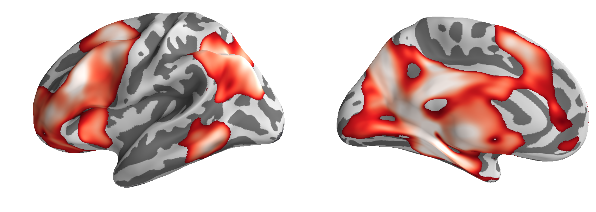

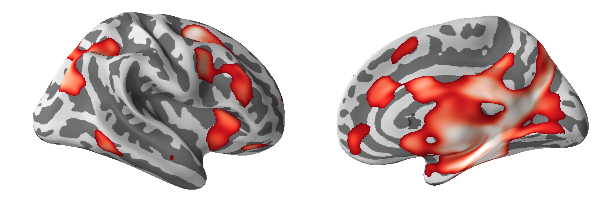

In [7]:
subj = 'fsaverage'
hemis = ['lh', 'rh']
exp = ['ap_memory_raw']
z_thresh = 2.3 # p < 0.01
contrasts = ['sourcehit-CR']
colors = ['Reds_r']
alpha = 1
snap_views = ['lat', 'med']
plot_conjunction=False

for hemi in hemis:
    b, snapshots = plot_contrasts(subj, hemi, exp, contrasts, colors, z_thresh, '', 
                                  base_exp='/Volumes/group/awagner/sgagnon/AP',
                                  group='group_control',
                                  snap_views=snap_views, sig_to_z=False, regspace='mni',
                                  corrected=True,
                                  save_file=False, plot_conjunction=plot_conjunction)

    plot_snapviews(snapshots, snap_views, hemi=hemi)
    

### Uncorrected p < 0.005; control > stress (assoc hit > CR)

In [27]:
subj = 'fsaverage'
hemis = ['lh', 'rh']
exp = ['ap_memory_raw']
z_thresh = 2.58 # p < 0.005
contrasts = ['sourcehit-CR']
colors = ['Blues_r']

for hemi in hemis:
    plot_contrasts(subj, hemi, exp, contrasts, colors, z_thresh, 
                  '/Volumes/group/awagner/sgagnon/AP/results/control-stress_sourcehit-CR/map_{hemi}_p005uncorr.png'.format(hemi=hemi), 
                  save_views =['lat', 'med', 'fro'], 
                  base_exp='/Volumes/group/awagner/sgagnon/AP',
                  alpha = 0.8,
                  group='group_control-stress',
                  colorbar=True,
                  sig_to_z=False, regspace='mni',
                  corrected=False)

ap_memory_raw sourcehit-CR
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-CR/zstat1.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2shwJvi7.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-CR/zstat1.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2shwJvi7.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-CR/zstat1.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sZT7HIr.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-CR/zstat1.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sZT7HIr.mgz


3.71
sourcehit-CR Blues_r
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-CR/zstat1.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2shb8XNA.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-CR/zstat1.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2shb8XNA.mgz


ap_memory_raw sourcehit-CR
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-CR/zstat1.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sXmjZMa.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-CR/zstat1.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sXmjZMa.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-CR/zstat1.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2syumINQ.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-CR/zstat1.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2syumINQ.mgz


3.71
sourcehit-CR Blues_r
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-CR/zstat1.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2slXbGOA.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-CR/zstat1.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2slXbGOA.mgz


In [15]:
# Visualize overlaid with Yeo CCN network (maroon / left lateral IPS)
b, snapshots =  plot_contrasts(subj, 'lh', exp, contrasts, colors, z_thresh, '', 
                                  base_exp='/Volumes/group/awagner/sgagnon/AP',
                                  group='group_control-stress',
                                  snap_views=snap_views, sig_to_z=False, regspace='mni',
                                  corrected=False,
                                  save_file=False, plot_conjunction=plot_conjunction)

b.add_label('17Networks_13', borders=True, color='maroon')

ap_memory_raw sourcehit-CR
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-CR/zstat1.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sz2jmkp.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-CR/zstat1.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sz2jmkp.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-CR/zstat1.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s2w5F0c.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-CR/zstat1.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s2w5F0c.mgz


3.71
sourcehit-CR Reds_r
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-CR/zstat1.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sM9WE7E.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-CR/zstat1.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sM9WE7E.mgz


### Uncorrected p < 0.005; safe runs, control > stress (assoc hit > CR)

ap_memory_raw-byshockCond safe_sourcehit-CR
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw-byshockCond/group_control-stress/mni/safe_sourcehit-CR/zstat1.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2saA615K.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw-byshockCond/group_control-stress/mni/safe_sourcehit-CR/zstat1.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2saA615K.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw-byshockCond/group_control-stress/mni/safe_sourcehit-CR/zstat1.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sufhY3p.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw-byshockCond/group_control-stress/mni/safe_sourcehit-CR/zstat1.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sufhY3p.mgz


3.71
safe_sourcehit-CR Reds_r
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw-byshockCond/group_control-stress/mni/safe_sourcehit-CR/zstat1.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2scI8hmJ.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw-byshockCond/group_control-stress/mni/safe_sourcehit-CR/zstat1.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2scI8hmJ.mgz


ap_memory_raw-byshockCond safe_sourcehit-CR
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw-byshockCond/group_control-stress/mni/safe_sourcehit-CR/zstat1.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sEg5aBY.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw-byshockCond/group_control-stress/mni/safe_sourcehit-CR/zstat1.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sEg5aBY.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw-byshockCond/group_control-stress/mni/safe_sourcehit-CR/zstat1.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2ssF_egc.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw-byshockCond/group_control-stress/mni/safe_sourcehit-CR/zstat1.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2ssF_egc.mgz


3.71
safe_sourcehit-CR Reds_r
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw-byshockCond/group_control-stress/mni/safe_sourcehit-CR/zstat1.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sRg3uj4.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw-byshockCond/group_control-stress/mni/safe_sourcehit-CR/zstat1.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sRg3uj4.mgz


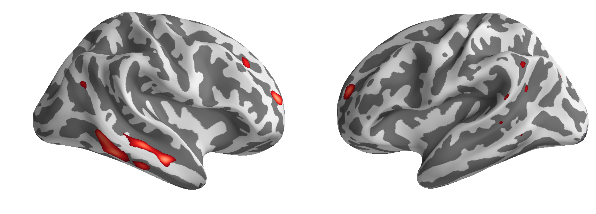

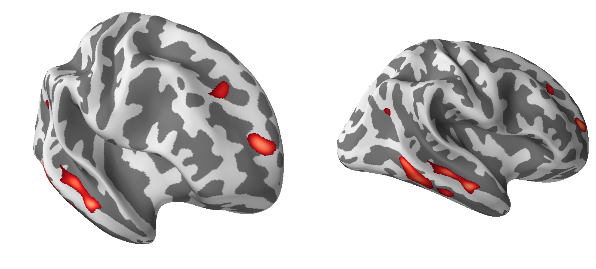

In [17]:
subj = 'fsaverage'
hemis = ['lh', 'rh']
exp = ['ap_memory_raw-byshockCond']
z_thresh = 2.5758 # p < 0.005
contrasts = ['safe_sourcehit-CR']
colors = ['Reds_r']
alpha = 1
snap_views = ['fro', 'lat']
plot_conjunction=False

for hemi in hemis:
    b, snapshots = plot_contrasts(subj, hemi, exp, contrasts, colors, z_thresh, '', 
                                  base_exp='/Volumes/group/awagner/sgagnon/AP',
                                  group='group_control-stress',
                                  snap_views=snap_views, sig_to_z=False, regspace='mni',
                                  corrected=False,
                                  save_file=False, plot_conjunction=plot_conjunction)

    plot_snapviews(snapshots, snap_views, hemi=hemi)

# By source accuracy

In [65]:
subj = 'fsaverage'
hemis = ['lh', 'rh']
exp = ['ap_memory_raw']
z_thresh = 2.3 # p < 0.01
contrasts = ['sourcehit-cr']
colors = ['PuBu_r']
alpha = 1
save_views = ['lat', 'med', 'fro']
plot_conjunction=False

# os.mkdir('/Volumes/group/awagner/sgagnon/AP/results/cov_sourceAcc_sh-cr')

for hemi in hemis:
    plot_contrasts(subj, hemi, exp, contrasts, colors, z_thresh, 
                   '/Volumes/group/awagner/sgagnon/AP/results/cov_sourceAcc_sh-cr/map_{hemi}_p05corr.png'.format(hemi=hemi),  
                  base_exp='/Volumes/group/awagner/sgagnon/AP',
                  group='group_cov_sourceAcc',
                  sig_to_z=False, 
                  alpha=.9,
                  regspace='mni',
                  save_views=save_views,
                  skip_reg_dir=False,
                  corrected=True, colorbar=True,
                  save_file=True, plot_conjunction=plot_conjunction)

ap_memory_raw sourcehit-cr
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_cov_sourceAcc/mni/sourcehit-cr/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s_le3Tc.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_cov_sourceAcc/mni/sourcehit-cr/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s_le3Tc.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_cov_sourceAcc/mni/sourcehit-cr/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sFKJUCQ.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_cov_sourceAcc/mni/sourcehit-cr/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sFKJUCQ.mgz


3.71
sourcehit-cr PuBu_r
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_cov_sourceAcc/mni/sourcehit-cr/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sKnmtFb.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_cov_sourceAcc/mni/sourcehit-cr/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sKnmtFb.mgz


ap_memory_raw sourcehit-cr
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_cov_sourceAcc/mni/sourcehit-cr/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s0IUDVx.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_cov_sourceAcc/mni/sourcehit-cr/zstat1_threshold.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s0IUDVx.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_cov_sourceAcc/mni/sourcehit-cr/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sj3qFUW.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_cov_sourceAcc/mni/sourcehit-cr/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sj3qFUW.mgz


3.71
sourcehit-cr PuBu_r
mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_cov_sourceAcc/mni/sourcehit-cr/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2scaR0mo.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_cov_sourceAcc/mni/sourcehit-cr/zstat1_threshold.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2scaR0mo.mgz


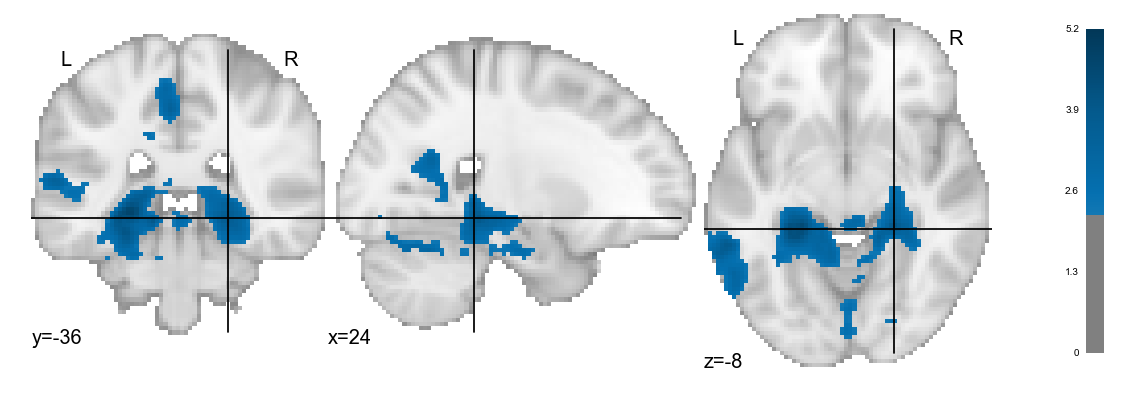

In [51]:
exp = 'ap_memory_raw'
group = 'group_cov_sourceAcc'
contrast = 'sourcehit-cr'
z_thresh = 2.3
stat_map = op.join('/Volumes/group/awagner/sgagnon/AP/analysis',
                   exp, group, 'mni', contrast, 'zstat1_threshold.nii.gz')
                   
    
fig = plt.figure(dpi=600, figsize=(15,5))
display = nip.plot_stat_map(stat_map, bg_img=mni_template,
                  threshold=z_thresh, display_mode='ortho', 
                  black_bg=False, 
                  cut_coords=[24, -36, -8], 
                  cmap='PuBu', colorbar=True, annotate=True, figure=fig)
display.annotate(size=20)
fig.savefig('/Volumes/group/awagner/sgagnon/AP/results/ap_memory_raw_covSourceAcc_sourcehit-cr.png')

# Plot searchlight localizer

In [62]:
subj = 'fsaverage'
mask_file = '/Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-cr/{hemi}.group_mask.mgz'
stat_temp = '/Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight/localizer_acc_t_tstat1_mask_p05corr.nii.gz'
sign = 'pos'
save_name = '/Volumes/group/awagner/sgagnon/AP/results/searchlight_localizer/{hemi}_localizer'
# os.mkdir('/Volumes/group/awagner/sgagnon/AP/results/searchlight_localizer')
z_thresh = 1.7

for hemi in ['lh', 'rh']:
    b = Brain(subj, hemi, 'semi7', background="white")
    add_mask_overlay(b, mask_file.format(hemi=hemi))

    z_max = calculate_sat_point(stat_temp, '', sign, subj=subj, sig_to_z=False)

    add_stat_overlay(b, stat_temp, z_thresh, z_max, sign,
                     hemi=hemi, sig_to_z=False, color='Greens_r', alpha=.9, 
                     output=True, colorbar=True)

    b.save_imageset(save_name.format(hemi=hemi), ['lat', 'fro', 'med', 'ven'])

mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight/localizer_acc_t_tstat1_mask_p05corr.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sc3AKTx.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight/localizer_acc_t_tstat1_mask_p05corr.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sc3AKTx.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight/localizer_acc_t_tstat1_mask_p05corr.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sAv0JDR.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight/localizer_acc_t_tstat1_mask_p05corr.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sAv0JDR.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight/localizer_acc_t_tstat1_mask_p05corr.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sGC_huz.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight/localizer_acc_t_tstat1_mask_p05corr.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sGC_huz.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight/localizer_acc_t_tstat1_mask_p05corr.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s_l8lAF.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight/localizer_acc_t_tstat1_mask_p05corr.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s_l8lAF.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight/localizer_acc_t_tstat1_mask_p05corr.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sxbs8BE.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight/localizer_acc_t_tstat1_mask_p05corr.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sxbs8BE.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight/localizer_acc_t_tstat1_mask_p05corr.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s03W4Lc.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight/localizer_acc_t_tstat1_mask_p05corr.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s03W4Lc.mgz


# Plot searchlight reinstatement

In [66]:
subj = 'fsaverage'
mask_file = '/Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/group_control-stress/mni/sourcehit-cr/{hemi}.group_mask.mgz'
stat_temp = '/Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight_test/sourcehit_time{time}_acc_t_tstat1_mask_p05corr.nii.gz'
sign = 'pos'
save_name = '/Volumes/group/awagner/sgagnon/AP/results/searchlight_test/{hemi}_test_{time}'
# os.mkdir('/Volumes/group/awagner/sgagnon/AP/results/searchlight_test')
z_thresh = 1.7

for time in [0,2,4,6,8,10,12]:
    for hemi in ['lh', 'rh']:
        b = Brain(subj, hemi, 'semi7', background="white")
        add_mask_overlay(b, mask_file.format(hemi=hemi))

        add_stat_overlay(b, stat_temp.format(time=str(time)), z_thresh, 10, sign,
                         hemi=hemi, sig_to_z=False, color='Greens_r', alpha=.9, 
                         output=True, colorbar=True)

        b.save_imageset(save_name.format(hemi=hemi, time=str(time)), ['lat', 'fro', 'med', 'ven'])

mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight_test/sourcehit_time0_acc_t_tstat1_mask_p05corr.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sJRxVZ6.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight_test/sourcehit_time0_acc_t_tstat1_mask_p05corr.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sJRxVZ6.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight_test/sourcehit_time0_acc_t_tstat1_mask_p05corr.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sOScM7i.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight_test/sourcehit_time0_acc_t_tstat1_mask_p05corr.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sOScM7i.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight_test/sourcehit_time2_acc_t_tstat1_mask_p05corr.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2skW0sB_.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight_test/sourcehit_time2_acc_t_tstat1_mask_p05corr.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2skW0sB_.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight_test/sourcehit_time2_acc_t_tstat1_mask_p05corr.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sF6Zovx.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight_test/sourcehit_time2_acc_t_tstat1_mask_p05corr.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sF6Zovx.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight_test/sourcehit_time4_acc_t_tstat1_mask_p05corr.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sfONTm9.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight_test/sourcehit_time4_acc_t_tstat1_mask_p05corr.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sfONTm9.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight_test/sourcehit_time4_acc_t_tstat1_mask_p05corr.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sYz20wv.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight_test/sourcehit_time4_acc_t_tstat1_mask_p05corr.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sYz20wv.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight_test/sourcehit_time6_acc_t_tstat1_mask_p05corr.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sNHgaYY.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight_test/sourcehit_time6_acc_t_tstat1_mask_p05corr.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sNHgaYY.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight_test/sourcehit_time6_acc_t_tstat1_mask_p05corr.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s2jSv5Q.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight_test/sourcehit_time6_acc_t_tstat1_mask_p05corr.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s2jSv5Q.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight_test/sourcehit_time8_acc_t_tstat1_mask_p05corr.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sD30H3p.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight_test/sourcehit_time8_acc_t_tstat1_mask_p05corr.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sD30H3p.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight_test/sourcehit_time8_acc_t_tstat1_mask_p05corr.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sdINsV9.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight_test/sourcehit_time8_acc_t_tstat1_mask_p05corr.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sdINsV9.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight_test/sourcehit_time10_acc_t_tstat1_mask_p05corr.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sEyOopM.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight_test/sourcehit_time10_acc_t_tstat1_mask_p05corr.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sEyOopM.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight_test/sourcehit_time10_acc_t_tstat1_mask_p05corr.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s29wcY_.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight_test/sourcehit_time10_acc_t_tstat1_mask_p05corr.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2s29wcY_.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight_test/sourcehit_time12_acc_t_tstat1_mask_p05corr.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2srJF5s7.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight_test/sourcehit_time12_acc_t_tstat1_mask_p05corr.nii.gz --hemi lh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2srJF5s7.mgz


mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight_test/sourcehit_time12_acc_t_tstat1_mask_p05corr.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sg_Ssu0.mgz


INFO:surfer:mri_vol2surf --mov /Volumes/group/awagner/sgagnon/AP/analysis/mvpa_raw/searchlight_test/sourcehit_time12_acc_t_tstat1_mask_p05corr.nii.gz --hemi rh --surf white --reg /Applications/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 5 --o /var/folders/xp/71y4c8j51293syxqsgb7qsz40000gp/T/pysurfer-v2sg_Ssu0.mgz
